In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tweepy
import requests
import json
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline


# 1.Gathering Data

## 1.1 twitter archieved data


In [65]:
tweeter_archieved_data = pd.read_csv('twitter-archive-enhanced.csv' , sep = ',')

## 1.2 image prediction data

In [66]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open('image-predictions.tsv', 'wb').write(response.content)

image_prediction_data = pd.DataFrame(pd.read_csv('image-predictions.tsv', sep = '\t'))


## 1.3 Twitter API data query

In [67]:
#https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [68]:
#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in tweeter_archieved_data['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 256
Rate limit reached. Sleeping for: 785
Rate limit reached. Sleeping for: 779
Rate limit reached. Sleeping for: 481
Rate limit reached. Sleeping for: 448


In [69]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets no found 25


In [70]:
#Then in this code block we isolate the json part of each tweepy 
#status object that we have downloaded and we add them all into a list

my_list_of_dicts = []
for each_json_tweet in list_of_tweets:
    my_list_of_dicts.append(each_json_tweet)


In [71]:
#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))

In [72]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

-------------------------------------------------------------------------------------------------------------------------------




## 2.  Assessment





### Tidiness Issue : 
To asseble 3 data sets into a master dataframe

## 2.1 twitter archive Assessments 


In [73]:
tweeter_archieved_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [74]:
tweeter_archieved_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [75]:
tweeter_archieved_data.duplicated().sum()

0

In [76]:
tweeter_archieved_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [77]:
tweeter_archieved_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


## 2.1 twitter archive Assessments 
### for quality:

1-columns needed to be deleted [ 'in_reply_status_id' , 'in_reply_to_user_id' , 'retweet_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' , 'rating_denominator' ]

2-deleting rating_numerator which is very high (greater than 20) 

3-deleting rating_numerator which is less than 10 

4-deleting rows which do not contain 'expanded urls'

5-change 'rating_numerator' to more expressive name 'rating_out_of_ten'

6-tweet_id type must be a string not an integer

7-Decimal dog ratings


### for tidiness

9-Multiple dog stages:changing ['doggo','floofer','pupper','puppo'] cleaning and rearranging the dog stages and merging into one column 

## 2.2 image prediction data


In [78]:
image_prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


.

In [79]:

image_prediction_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [80]:
image_prediction_data.duplicated().sum()

0

In [81]:
image_prediction_data.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [82]:
image_prediction_data.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [83]:
image_prediction_data.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [84]:
image_prediction_data.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

# 2.2 Assessments for quality:

1-tweet_id type must be a string not an integer.

2-The columns [ 'jpg_url' , 'p1_dog' , 'p2_dog' , 'p3_dog' ] will be removed





## 2.3 Twitter API data query


In [85]:
tweet_json.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [86]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35703,7550,8855472,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30873,5595,8855472,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23208,3705,8855472,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38995,7731,8855472,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37254,8331,8855472,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...
2326,666049248165822465,96,40,8855409,17,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2327,666044226329800704,266,126,8855409,17,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2328,666033412701032449,111,39,8855409,17,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2329,666029285002620928,120,41,8855409,17,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


In [87]:
tweet_json.friends_count.value_counts()

17    2331
Name: friends_count, dtype: int64

### Tidiness issues
1- friends_count column should be deleted it has only one repititive irrelevent value

2-retweet status should be deleted

3-source column should be deleted



# 3.Cleaning Data

## 3.1 twitter archive Assessments 


In [88]:
twitter_archive_clean = tweeter_archieved_data.copy()


In [89]:
#define
# 1-columns needed to be deleted [ 'in_reply_status_id' , 'in_reply_to_user_id' 
# , 'retweet_status_id' , 'retweeted_status_user_id' , 'retweeted_status_timestamp' , 'rating_denominator' ]

#code
drop_cols = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',\
             'retweeted_status_user_id','retweeted_status_timestamp','rating_denominator']


twitter_archive_clean.drop(drop_cols, inplace=True, axis=1)

In [90]:
# Test
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,None,None,None


In [91]:
#define
# 2-deleting rating_numerator which is very high (greater than 20) 

#code
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator >20].index, inplace = True)


In [92]:
# Test
twitter_archive_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
2       9
1       9
0       2
15      2
17      1
20      1
Name: rating_numerator, dtype: int64

In [93]:
#define
# 3-deleting rating_numerator which is less than 10 

# code
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator < 10].index, inplace = True)


In [94]:
# Test
twitter_archive_clean.rating_numerator.value_counts()

12    558
11    464
10    461
13    351
14     54
15      2
20      1
17      1
Name: rating_numerator, dtype: int64

In [95]:
#define
# 4-deleting rows which do not contain 'expanded urls'

#code
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.expanded_urls.isnull()].index, inplace = True)



In [96]:
# Test
twitter_archive_clean.expanded_urls.isnull().sum()

0

In [97]:
# Deifne
# 5-change 'rating_numerator' to more expressive name 'rating_out_of_ten'
twitter_archive_clean.rename(columns = {'rating_numerator':'rating_out_of_ten'}, inplace = True)

In [98]:
# Test
twitter_archive_clean.head(0)

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_ten,name,doggo,floofer,pupper,puppo


In [99]:
# Define
# 6-tweet_id type must be a string not an integer

# Code
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype(str)

In [100]:
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 2350
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1847 non-null   object
 1   timestamp          1847 non-null   object
 2   source             1847 non-null   object
 3   text               1847 non-null   object
 4   expanded_urls      1847 non-null   object
 5   rating_out_of_ten  1847 non-null   int64 
 6   name               1847 non-null   object
 7   doggo              1847 non-null   object
 8   floofer            1847 non-null   object
 9   pupper             1847 non-null   object
 10  puppo              1847 non-null   object
dtypes: int64(1), object(10)
memory usage: 173.2+ KB


In [101]:
# Define
# Decimal dog rating

# Code
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_out_of_ten']]

C:\Users\ahmed\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_out_of_ten


In [102]:
twitter_archive_clean.rating_out_of_ten.value_counts()

12    547
11    455
10    455
13    339
14     50
15      1
Name: rating_out_of_ten, dtype: int64

In [103]:
# Define
# 8-Multiple dog stages : cleaning and rearranging the dog stages and merging into one column .


# handle none 
twitter_archive_clean.doggo.replace('None','', inplace = True)
twitter_archive_clean.floofer.replace('None','', inplace = True)
twitter_archive_clean.pupper.replace('None','', inplace = True )
twitter_archive_clean.puppo.replace('None', '', inplace=True)

# merging into one columns
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo


# handle multiple stages
# handle multiple stages
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

# deleting old columns
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], inplace = True , axis = 1)


In [104]:
# Test
twitter_archive_clean.head()
                                                   

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_ten,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN


In [105]:
twitter_archive_clean.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_ten,name,dog_stage
1456,695314793360662529,2016-02-04 18:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Colin. He really likes green beans. It...,https://twitter.com/dog_rates/status/695314793...,10,Colin,NaN
254,844580511645339650,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,https://twitter.com/dog_rates/status/844580511...,11,Charlie,NaN
275,840696689258311684,2017-03-11 22:51:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I didn't even have to intervene. Took him 4 mi...,https://twitter.com/dog_rates/status/840696689...,10,None,NaN
1007,747600769478692864,2016-06-28 01:21:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bookstore and Seaweed. Bookstore is ti...,https://twitter.com/dog_rates/status/747600769...,10,Bookstore,NaN
807,771908950375665664,2016-09-03 03:13:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Doggo will persevere. 13/10\nhttps://t.co/yOVz...,https://twitter.com/yahoonews/status/771905568...,13,None,doggo
17,888804989199671297,2017-07-22 16:56:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13,Zeke,NaN
1716,680206703334408192,2015-12-25 02:01:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I hope everyone enjoys this picture as much as...,https://twitter.com/dog_rates/status/680206703...,12,Toby,NaN
245,845812042753855489,2017-03-26 01:38:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate polar bears but this one...,https://twitter.com/dog_rates/status/845812042...,13,None,NaN
2078,670832455012716544,2015-11-29 05:11:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amy. She is Queen Starburst. 10/10 une...,https://twitter.com/dog_rates/status/670832455...,10,Amy,NaN
2007,672264251789176834,2015-12-03 04:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He has the eyes of a tyrannical ...,https://twitter.com/dog_rates/status/672264251...,10,Kreg,NaN


In [106]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1847 entries, 0 to 2350
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           1847 non-null   object
 1   timestamp          1847 non-null   object
 2   source             1847 non-null   object
 3   text               1847 non-null   object
 4   expanded_urls      1847 non-null   object
 5   rating_out_of_ten  1847 non-null   int64 
 6   name               1847 non-null   object
 7   dog_stage          325 non-null    object
dtypes: int64(1), object(7)
memory usage: 129.9+ KB


## 3.2  image prediction data





In [107]:
image_prediction_clean = image_prediction_data.copy()


In [108]:
# Define
# 1-tweet_id type must be a string not an integer.

#Code
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype(str)

In [109]:
# Test
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [110]:
# Define
# 2-The columns ['jpg_url','p1_dog','p2_dog','p3_dog'] will be removed

# Code
image_prediction_clean.drop(['jpg_url','p1_dog','p2_dog','p3_dog'], inplace = True , axis = 1)


In [111]:
#Test
image_prediction_clean.head()


,tweet_id,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428
1,666029285002620928,1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010
2,666033412701032449,1,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752
4,666049248165822465,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629


## 3.3  json tweets data



In [112]:
tweet_json_clean = tweet_json.copy()
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [113]:
tweet_json_clean.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,35703,7550,8855472,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30873,5595,8855472,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,23208,3705,8855472,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38995,7731,8855472,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,37254,8331,8855472,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [114]:
# Define
# 1,2 and 3 -> Drop columns friends_count , retweeted_status and source

# Code
tweet_json_clean.drop(['friends_count','retweeted_status','source'],inplace = True ,axis = 1)

In [115]:
# Test
tweet_json_clean.head()

,tweet_id,favorite_count,retweet_count,followers_count,url
0,892420643555336193,35703,7550,8855472,https://t.co/MgUWQ76dJU
1,892177421306343426,30873,5595,8855472,https://t.co/aQFSeaCu9L
2,891815181378084864,23208,3705,8855472,https://t.co/r0YlrsGCgy
3,891689557279858688,38995,7731,8855472,https://t.co/tD36da7qLQ
4,891327558926688256,37254,8331,8855472,https://t.co/0g0KMIVXZ3


                -------------------------------------------------------------------------------------

### Global Tidiness issue : combine 3 data sets into single master data set

In [116]:
# first we need to see the 3 data sets after cleaning

twitter_archive_clean


,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_ten,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,NaN
...,...,...,...,...,...,...,...,...
2339,666102155909144576,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,https://twitter.com/dog_rates/status/666102155...,11,None,NaN
2343,666073100786774016,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,https://twitter.com/dog_rates/status/666073100...,10,None,NaN
2345,666063827256086533,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10,the,NaN
2348,666055525042405380,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,a,NaN


In [117]:
image_prediction_clean


,tweet_id,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf
0,666020888022790149,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428
1,666029285002620928,1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010
2,666033412701032449,1,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197
3,666044226329800704,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752
4,666049248165822465,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629
...,...,...,...,...,...,...,...,...
2070,891327558926688256,2,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219
2071,891689557279858688,1,paper_towel,0.170278,Labrador_retriever,0.168086,spatula,0.040836
2072,891815181378084864,1,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379
2073,892177421306343426,1,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957


In [118]:
tweet_json_clean

,tweet_id,favorite_count,retweet_count,followers_count,url
0,892420643555336193,35703,7550,8855472,https://t.co/MgUWQ76dJU
1,892177421306343426,30873,5595,8855472,https://t.co/aQFSeaCu9L
2,891815181378084864,23208,3705,8855472,https://t.co/r0YlrsGCgy
3,891689557279858688,38995,7731,8855472,https://t.co/tD36da7qLQ
4,891327558926688256,37254,8331,8855472,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...
2326,666049248165822465,96,40,8855409,https://t.co/4B7cOc1EDq
2327,666044226329800704,266,126,8855409,https://t.co/DWnyCjf2mx
2328,666033412701032449,111,39,8855409,https://t.co/y671yMhoiR
2329,666029285002620928,120,41,8855409,https://t.co/r7mOb2m0UI


In [119]:
# merging 
DataFrame = pd.merge(twitter_archive_clean,image_prediction_clean, on = 'tweet_id', how = 'outer')


In [120]:
master_DataFrame = pd.merge(DataFrame,tweet_json_clean, on = 'tweet_id', how = 'outer')

In [121]:
master_DataFrame

,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_ten,name,dog_stage,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,favorite_count,retweet_count,followers_count,url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN,1.0,orange,0.097049,bagel,0.085851,banana,0.076110,35703.0,7550.0,8855472.0,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,1.0,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,30873.0,5595.0,8855472.0,https://t.co/aQFSeaCu9L
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,1.0,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,23208.0,3705.0,8855472.0,https://t.co/r0YlrsGCgy
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,1.0,paper_towel,0.170278,Labrador_retriever,0.168086,spatula,0.040836,38995.0,7731.0,8855472.0,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,2.0,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,37254.0,8331.0,8855472.0,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,673716320723169284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2939.0,710.0,8855409.0,u
2351,671550332464455680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,863.0,197.0,8855409.0,s
2352,669684865554620416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,483.0,83.0,8855410.0,0
2353,668967877119254528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0,21.0,8855410.0,5


 ------------------------------------------------------------------------------------------------------------------------------

# 4. Storing

In [122]:
#Store the clean DataFrame in a CSV file
master_DataFrame.to_csv('master_DataFrame.csv' , index = False , encoding = 'utf-8')

In [123]:
#Store the clean DataFrame in a database
conn = sqlite3.connect('master_DataFrame.db')

In [124]:
master_DataFrame.to_sql('master_DataFrame', conn, if_exists = 'replace', index = False)

In [125]:
 pd.read_sql('select * from master_DataFrame', conn)


,tweet_id,timestamp,source,text,expanded_urls,rating_out_of_ten,name,dog_stage,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,favorite_count,retweet_count,followers_count,url
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,None,1.0,orange,0.097049,bagel,0.085851,banana,0.076110,35703.0,7550.0,8855472.0,https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,None,1.0,Chihuahua,0.323581,Pekinese,0.090647,papillon,0.068957,30873.0,5595.0,8855472.0,https://t.co/aQFSeaCu9L
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,None,1.0,Chihuahua,0.716012,malamute,0.078253,kelpie,0.031379,23208.0,3705.0,8855472.0,https://t.co/r0YlrsGCgy
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,None,1.0,paper_towel,0.170278,Labrador_retriever,0.168086,spatula,0.040836,38995.0,7731.0,8855472.0,https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,None,2.0,basset,0.555712,English_springer,0.225770,German_short-haired_pointer,0.175219,37254.0,8331.0,8855472.0,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2350,673716320723169284,None,None,None,None,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,2939.0,710.0,8855409.0,u
2351,671550332464455680,None,None,None,None,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,863.0,197.0,8855409.0,s
2352,669684865554620416,None,None,None,None,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,483.0,83.0,8855410.0,0
2353,668967877119254528,None,None,None,None,NaN,None,None,NaN,None,NaN,None,NaN,None,NaN,136.0,21.0,8855410.0,5


#  Analysis and Visualization

(-1.306178009917084,
 1.2265738138879447,
 -1.206842110432703,
 1.2092158164526714)

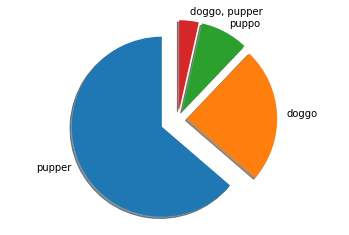

In [128]:
life_stage_count = list(twitter_archive_clean[twitter_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
life_stages = twitter_archive_clean[twitter_archive_clean['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

## Analysis I
* Dogs in Pupper stage of dog life cycle get most tweets.

In [129]:
master_DataFrame['p1'].value_counts()


golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
maze                    1
pot                     1
clumber                 1
bald_eagle              1
hammer                  1
Name: p1, Length: 378, dtype: int64

In [138]:
master_DataFrame['p1'].value_counts().sum()



2075

## Analysis II
The mean and median of ratings out of ten are 11.5 and 12 respectively


In [130]:

master_DataFrame.rating_out_of_ten.describe()


count    1847.000000
mean       11.500271
std         1.131100
min        10.000000
25%        11.000000
50%        12.000000
75%        12.000000
max        15.000000
Name: rating_out_of_ten, dtype: float64

In [131]:
master_DataFrame.rating_out_of_ten.median()

12.0

In [132]:
master_DataFrame.favorite_count.describe()


count      2331.000000
mean       7459.636637
std       11581.578363
min           0.000000
25%        1297.500000
50%        3243.000000
75%        9138.000000
max      153911.000000
Name: favorite_count, dtype: float64

In [133]:
master_DataFrame.favorite_count.median()

3243.0

## Analysis III
The mean and median of favorite count are  8415.21 and 3891 respectively


In [141]:
master_DataFrame['dog_stage'].value_counts()


pupper            200
doggo              76
puppo              27
doggo, pupper      11
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

(-1.3091407513035178,
 1.2285630528852356,
 -1.2368983775853382,
 1.1984304632363236)

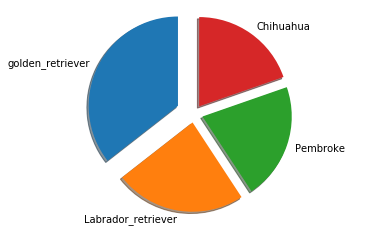

In [135]:
life_stage_count = list(master_DataFrame[master_DataFrame['p1'] != 'None']['p1'].value_counts())[0:4]
life_stages = master_DataFrame[master_DataFrame['p1'] != 'None']['p1'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(life_stage_count, explode = explode, labels = life_stages, shadow = True, startangle = 90)
axis1.axis('equal')

## Analysis IV
* The most popular dog, based on image predictions, is a Golden Retriever
